In [20]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [21]:
X,y = make_classification(n_samples=200,n_features = 5, n_informative=5, n_redundant=0, n_clusters_per_class=1)

In [22]:
df = pd.DataFrame(X,columns = ['col1','col2','col3', 'col4', 'col5'])
df['target'] = y
print(df.shape)
df.head()

(200, 6)


,col1,col2,col3,col4,col5,target
0,0.190577,-1.520913,1.026587,-1.875636,-1.563174,0
1,0.294867,-1.579805,2.204190,2.483855,-1.323986,1
2,3.244494,0.962895,-0.265389,0.835281,0.499858,0
3,1.199479,-1.125257,2.075124,-1.570822,-0.001191,0
4,2.168601,-1.163560,0.471984,-0.037464,0.155689,0


In [23]:
# funtion for row sampling
def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)


In [24]:
# funtion for feature sampling
def sample_features(df, percent):
    cols = np.random.sample(df.columns.tolist()[:-1], size=int(percent * df.shape[1]))
    return df[cols]



In [25]:
# function for combined sampling
def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [26]:
df1 = sample_rows(df,0.2)

In [27]:
df2 = sample_rows(df,0.2)

In [28]:
df3 = sample_rows(df,0.2)

In [29]:
df1.shape

(40, 6)

In [30]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()


In [31]:
clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.4, 0.9, 'x[3] <= -0.316\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(0.2, 0.7, 'x[4] <= 1.557\ngini = 0.1\nsamples = 19\nvalue = [18, 1]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 18\nvalue = [18, 0]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.7, 'x[0] <= 0.544\ngini = 0.245\nsamples = 21\nvalue = [3, 18]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.7, 0.5, 'x[1] <= -0.193\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.3, 'x[1] <= 0.709\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

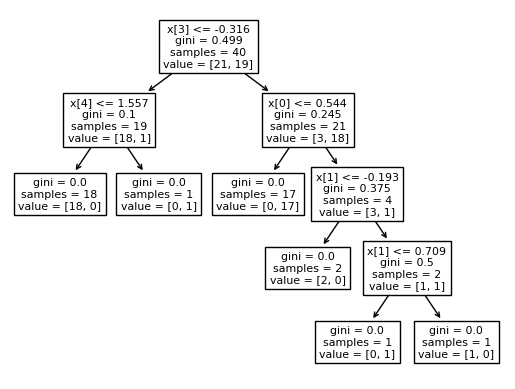

In [32]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.4444444444444444, 0.875, 'x[0] <= -0.072\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(0.2222222222222222, 0.625, 'x[3] <= -1.966\ngini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.6666666666666666, 0.625, 'x[4] <= -1.949\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.375, 'x[2] <= -1.374\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]')]

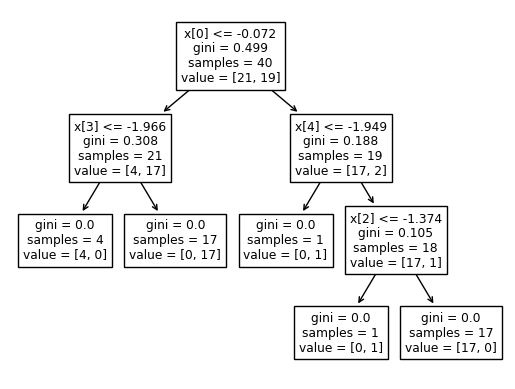

In [33]:
plot_tree(clf2)

[Text(0.4444444444444444, 0.875, 'x[0] <= -0.072\ngini = 0.499\nsamples = 40\nvalue = [21, 19]'),
 Text(0.2222222222222222, 0.625, 'x[3] <= -1.966\ngini = 0.308\nsamples = 21\nvalue = [4, 17]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.6666666666666666, 0.625, 'x[4] <= -1.949\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.375, 'x[2] <= -1.374\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]')]

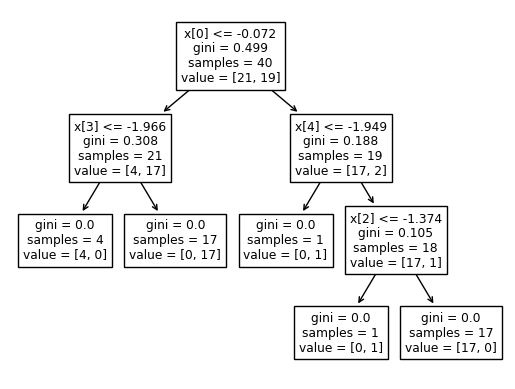

In [34]:
plot_tree(clf2)

[Text(0.4444444444444444, 0.875, 'x[0] <= 0.177\ngini = 0.495\nsamples = 40\nvalue = [22, 18]'),
 Text(0.2222222222222222, 0.625, 'x[3] <= -1.147\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(0.6666666666666666, 0.625, 'x[1] <= -2.169\ngini = 0.236\nsamples = 22\nvalue = [19, 3]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.7777777777777778, 0.375, 'x[3] <= 1.837\ngini = 0.095\nsamples = 20\nvalue = [19, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 19\nvalue = [19, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

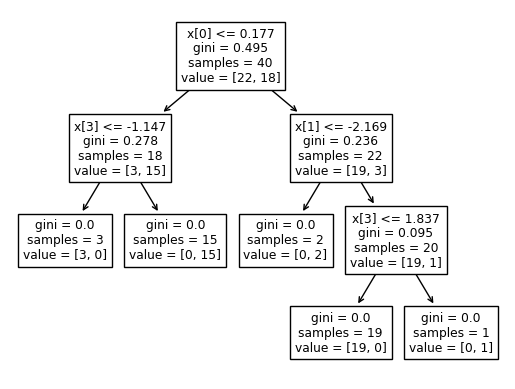

In [35]:
plot_tree(clf3)

In [36]:
clf1.predict(np.array([0.551380, -1807618, -1807618, -1.557932, -0.039800]).reshape(1,5))

C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [37]:
clf2.predict(np.array([0.551380, -1807618, -1807618, -1.557932, -0.039800]).reshape(1,5))

C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [38]:
clf3.predict(np.array([0.551380, -1807618, -1807618, -1.557932, -0.039800]).reshape(1,5))

C:\Users\ashmi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

So, our model predict yes because 2 model saying yes or 1 model saying No